In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

mnist = datasets.load_digits()
x = mnist.data
y = mnist.target

print(x.shape)

(1797, 64)


1. PCA

In [28]:
from sklearn.decomposition import PCA

Text(0.5, 1.0, 'Explained Variance by Components')

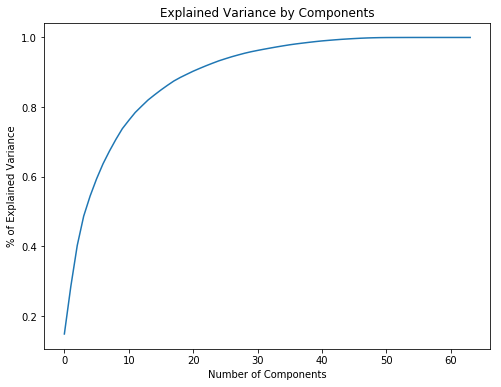

In [29]:
pca = PCA()
x_pca = pca.fit_transform(x)
cum_ratio = np.cumsum(pca.explained_variance_ratio_)

f, ax = plt.subplots(figsize=(8,6))
plt.plot(range(len(cum_ratio)), cum_ratio)
plt.ylabel('% of Explained Variance')
plt.xlabel('Number of Components')
plt.title('Explained Variance by Components')

A. I'm choosing to use 30 components because that controls for most of the variance and less components will help the model run faster. So no reason to use over 30.

Text(0.5, 1.0, 'First 2 Principle Components')

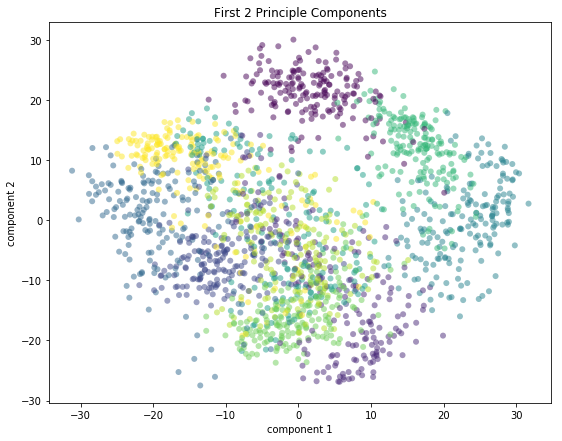

In [30]:
pca = PCA(n_components = 2)
data_pca = pca.fit_transform(x)

f, ax = plt.subplots(figsize = (9,7))
plt.scatter(data_pca[:, 0], data_pca[:, 1],
            c=y, edgecolor='none', alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('First 2 Principle Components')

B. The purple looks to be pretty condensed at the top and bottom of the plot. The other colors are more scattered.

C. PCA is used to reduce dimensionality in the data. It accomplishes this by dropping the the axes with the lowest variance. I guess the drawback would be that it isn't exactly necessary. For models like KNN it would be helpful since dimensionality can ruin a KNN model. But in general most models and algrithms don't need reduced dimensionality.

In [44]:
def plot_digit(data):
    fig, axes = plt.subplots(1, 6, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))

ValueError: cannot reshape array of size 64 into shape (6,5)

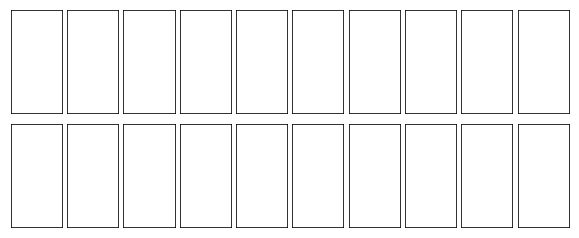

In [45]:
plot_digits(x)

Couldn't get this to work and I am not sure why. It was just supposed to show the original data pre compression.

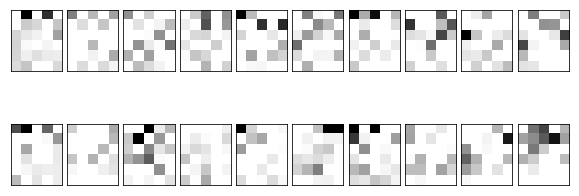

In [33]:
pca = PCA(n_components = 30)
x_pca = pca.fit_transform(x)
plot_digits(x_pca)

D. Compressed data just looks like pixels with not pattern or image at all.

2. TSNE

In [35]:
from sklearn.manifold import TSNE

#Reduce Dimensionality Before Feeding In
pca = PCA(n_components=50)
x_pca = pca.fit_transform(x)

rows = np.arange(1797)
np.random.shuffle(rows)
n_select = 10000

tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(x_pca[rows[:n_select],:])

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.010s...
[t-SNE] Computed neighbors for 1797 samples in 0.711s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 8.639318
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.700298
[t-SNE] KL divergence after 1000 iterations: 0.686597


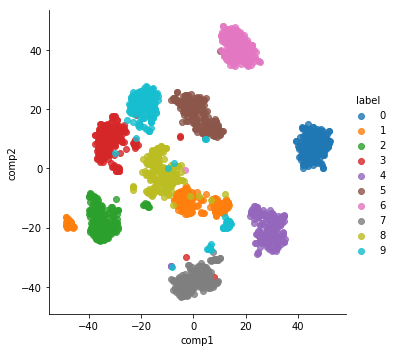

In [36]:
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

A. This plot is way tighter than the PCA used above. Each cluster is prtty much on it's own.

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.012s...
[t-SNE] Computed neighbors for 1797 samples in 0.526s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 6.719964
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.743767
[t-SNE] KL divergence after 1000 iterations: 0.890340


Text(0.5, 1.0, 't-SNE (Perplexity = 10)')

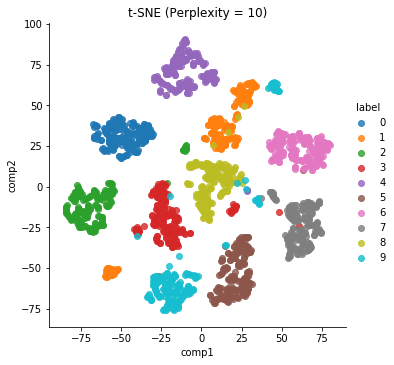

In [37]:
tsne = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(x_pca[rows[:n_select],:])

df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)
plt.title('t-SNE (Perplexity = 10)')

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.010s...
[t-SNE] Computed neighbors for 1797 samples in 0.499s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 5.706739
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.312828
[t-SNE] KL divergence after 1000 iterations: 0.924575


Text(0.5, 1.0, 't-SNE (Perplexity = 5)')

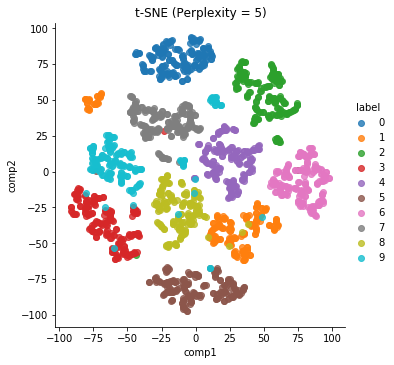

In [38]:
tsne = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(x_pca[rows[:n_select],:])

df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)
plt.title('t-SNE (Perplexity = 5)')

B. Reducing perplexity makes the clusters seperate and become less tight.

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.010s...
[t-SNE] Computed neighbors for 1797 samples in 0.474s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 5.706739
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.306725
[t-SNE] KL divergence after 300 iterations: 1.800202


Text(0.5, 1.0, 't-SNE (Iterations = 300)')

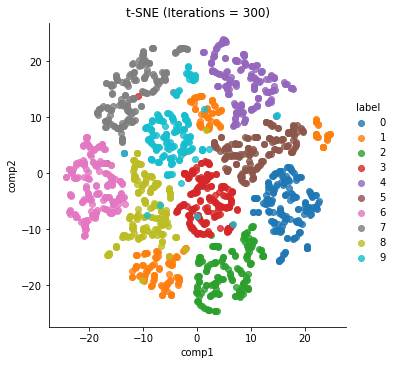

In [39]:
tsne = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=300, learning_rate=200)
tsne_results = tsne.fit_transform(x_pca[rows[:n_select],:])

df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)
plt.title('t-SNE (Iterations = 300)')

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.013s...
[t-SNE] Computed neighbors for 1797 samples in 0.524s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 5.706739
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.167336
[t-SNE] KL divergence after 1000 iterations: 1.071826


Text(0.5, 1.0, 't-SNE (Learning Rate = 10)')

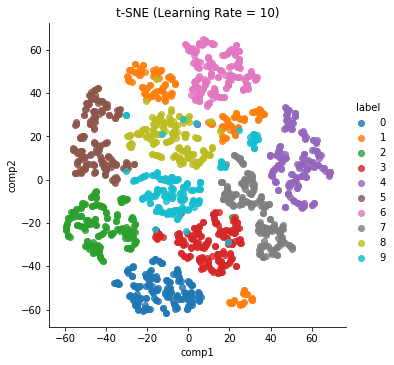

In [40]:
tsne = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=1000, learning_rate=10)
tsne_results = tsne.fit_transform(x_pca[rows[:n_select],:])

df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)
plt.title('t-SNE (Learning Rate = 10)')

C. There were minimal changes with variation in the learning rate. Looks like the model is pretty robust in that sense.

3. K-Means Clustering

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [12]:
kmeans = KMeans(n_clusters=10, n_init=50)
kmeans.fit(x)
labels = kmeans.labels_
silhouette_score(x, labels, metric='euclidean')

0.05869201052848764

A. After doing a little bit of research using Google, I found out that K shoul be 10.

B. Again after some time on Google I came across the Silhouette Score, which I used to evaluate my model.

C. Below

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.015s...
[t-SNE] Computed neighbors for 1797 samples in 0.848s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 8.121139
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.800453
[t-SNE] KL divergence after 1000 iterations: 0.760947


Text(0.5, 1.0, 'K-Means Clustering')

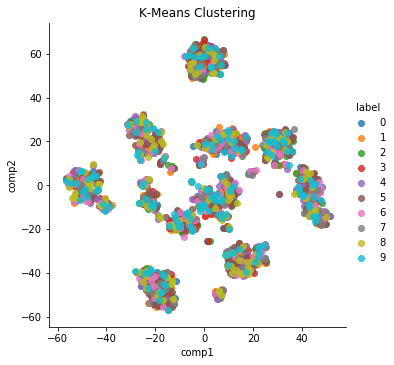

In [41]:
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000, learning_rate=50)
tsne_results = tsne.fit_transform(x[rows[:n_select],:])

df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = labels[rows[:n_select]]

sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)
plt.title('K-Means Clustering')

D. I did not scale my data because I didn't think it was neccessary

E. OVerall it looks pretty robust, it is in distinct little groups but the colors are more mixed than the previous models.

4. Hierarchical Clustering

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [18]:
x_cluster = x[:100]

A. Below

Text(0.5, 1.0, 'Complete Linkage')

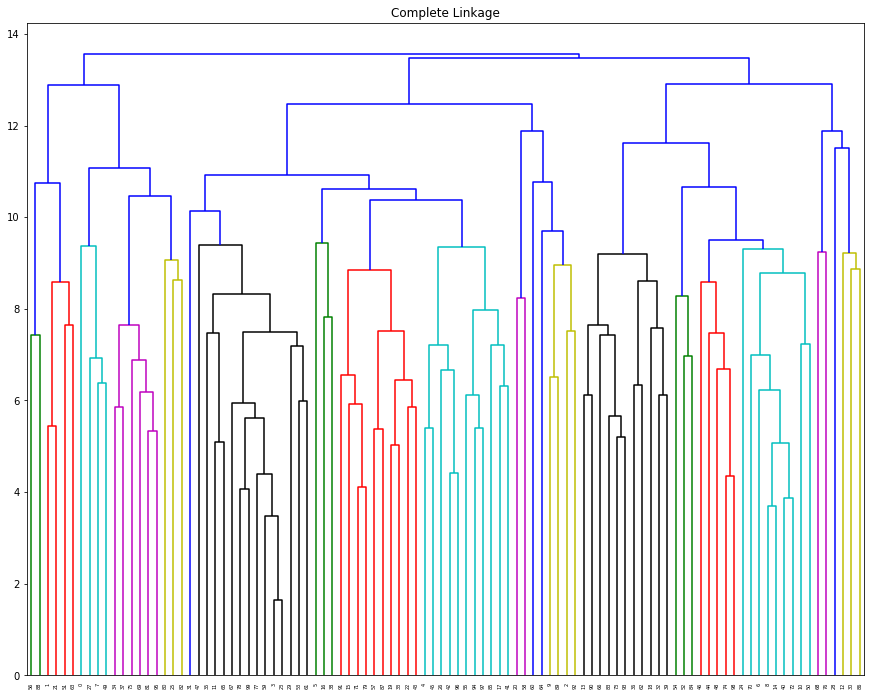

In [19]:
Z = linkage(x_cluster, 'complete')
plt.figure(figsize=(15, 12))
_ = dendrogram(Z)
plt.title('Complete Linkage')

B. Looks like there are about 15 clusters just by looking at the graph.

Text(0.5, 1.0, 'Average Linkage')

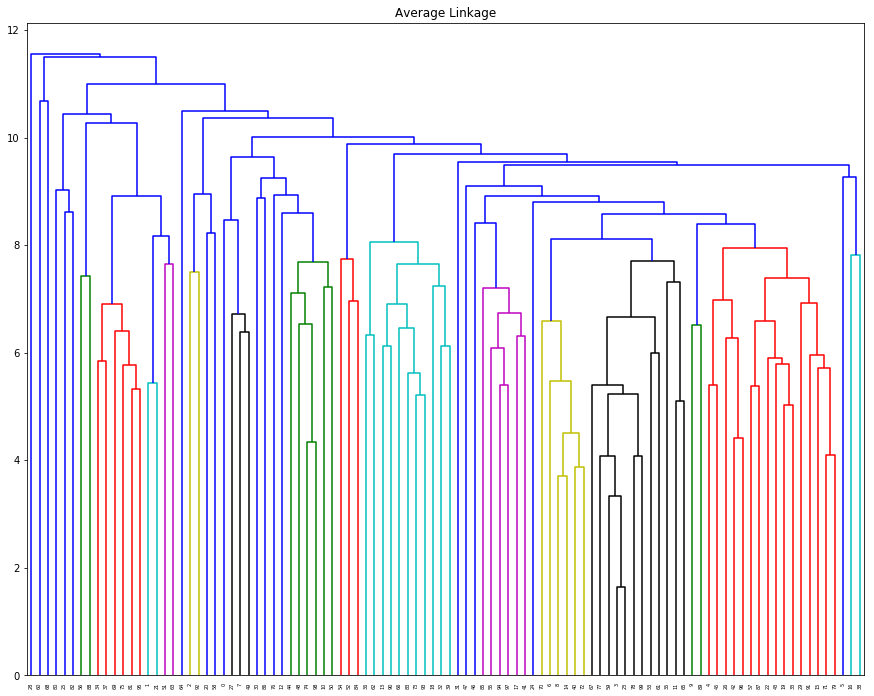

In [20]:
Z = linkage(x_cluster, 'average')
plt.figure(figsize=(15, 12))
_ = dendrogram(Z)
plt.title('Average Linkage')

C. Comapred linkage looks like it has less clusters than average linkage. Complete also makes a lot of connections early and average linkage makes a lot of connections late.